## Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors  import KNeighborsClassifier

## Loading Dataset

In [2]:
wine = pd.read_csv('C:\\Users\\nigbu\\Desktop\\winequality-red.csv',sep=';')

## Printing Top 5 Data

In [3]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Printing Info

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine['quality'].unique()
# 3 4 5 6 7 8

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Count Null Values

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Preprocessing Data

In [7]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
bins=[2,5.5,8]
group_names=['low', 'high']
wine['quality']=pd.cut(wine['quality'],bins=bins, labels=group_names)
wine['quality'].unique()

['low', 'high']
Categories (2, object): ['low' < 'high']

In [9]:
wine['quality'].value_counts()

high    855
low     744
Name: quality, dtype: int64

In [10]:
le = LabelEncoder()

## Classifying the Qualities Based on Their Quality as 0 or 1

In [11]:
wine['quality']=le.fit_transform(wine['quality'])

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


## Plotting the Count/Quality Graph

C:\Users\nigbu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

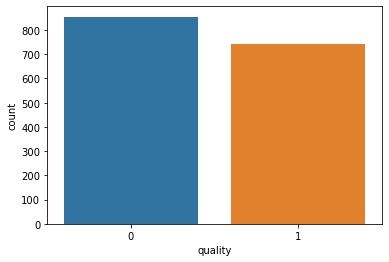

In [13]:
sns.countplot(wine['quality'])

## Seperate the Dataset as Response Variable and Feature Variables

In [14]:
X = wine.drop('quality',axis=1)
y = wine['quality']

## Train and Test Splitting of Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Applying Standard Scaling to Get Optimized Results

In [16]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classifier


In [17]:
rfc = RandomForestClassifier(n_estimators=11)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print("\nAccuracy Score: %.3f " % accuracy_score(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       179
           1       0.76      0.77      0.76       141

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

[[145  34]
 [ 33 108]]

Accuracy Score: 0.791 


## SVM Classifier

In [19]:
clf = svm.SVC(kernel='poly',coef0=5.0,max_iter=-1)
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [20]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))
print("\nAccuracy Score: %.3f " % accuracy_score(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       179
           1       0.75      0.77      0.76       141

    accuracy                           0.79       320
   macro avg       0.78      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

[[143  36]
 [ 32 109]]

Accuracy Score: 0.787 


## KNN

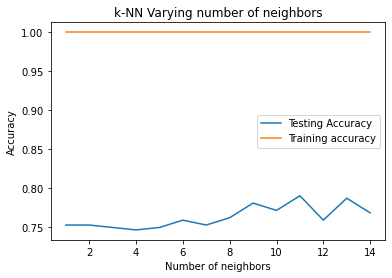

In [21]:
#checking the best number of neighbors
neighbors = np.arange(1,15)
neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=11,weights='distance')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [23]:
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print("\nAccuracy Score: %.3f " % accuracy_score(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       179
           1       0.77      0.74      0.76       141

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

[[148  31]
 [ 36 105]]

Accuracy Score: 0.791 


## Neural Network

In [24]:
#more layers can lead to overfitting
mlpc=MLPClassifier(hidden_layer_sizes=(100,50,25),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

In [25]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))
print("\nAccuracy Score: %.3f " % accuracy_score(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       179
           1       0.75      0.69      0.72       141

    accuracy                           0.76       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320

[[146  33]
 [ 44  97]]

Accuracy Score: 0.759 


In [26]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


## Testing Manually

In [27]:
#xnew 0, 1
Xnew = [[7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0],[11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8]]
Xnew = sc.fit_transform(Xnew)
ynew = knn.predict(Xnew)
ynew

array([0, 0])